### keras.js
### https://transcranial.github.io/keras-js/#/mnist-cnn


# Setup

In [0]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

# Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1) #마지막에 차원을 추가함
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)


# Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Train the model

In [4]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 39s 92ms/step - loss: 0.3548 - accuracy: 0.8929 - val_loss: 0.0859 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 38s 91ms/step - loss: 0.1109 - accuracy: 0.9662 - val_loss: 0.0554 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 38s 91ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0468 - val_accuracy: 0.9873
Epoch 4/15
422/422 [==============================] - 38s 91ms/step - loss: 0.0682 - accuracy: 0.9783 - val_loss: 0.0415 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 38s 91ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 38s 91ms/step - loss: 0.0515 - accuracy: 0.9840 - val_loss: 0.0364 - val_accuracy: 0.9900
Epoch 7/15
422/422 [==============================] - 39s 91ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0333 - val_accuracy:

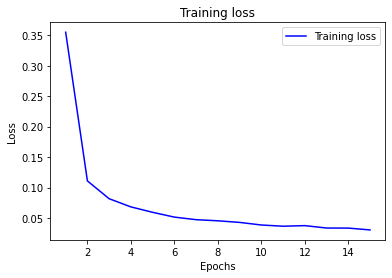

In [5]:
history_dict = history.history
loss = history_dict['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label = 'Training loss') 
plt.rcParams["figure.figsize"] = (18,8)
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.grid'] = True 
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the trained model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02356773614883423
Test accuracy: 0.9922000169754028
